<a href="https://colab.research.google.com/github/MartinSotelo2569/sales_predictions/blob/main/PA2/proyecto1_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
df_spredictions = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Analytics/Ejercicios de la plataforma Coding Dojo/Data Set_Proyecto/sales_predictions.csv')
df_spredictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
df_spredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
df_spredictions.duplicated().sum()

0

##Limpieza de datos

###Ordenar el data frame desde la columna Item_Identifier

In [44]:
df_spredictions['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
df_spredictions.sort_values(by='Item_Identifier', inplace=True)
df_spredictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


###Completar los NaN de la columna Item_Weight

In [46]:
mapea = df_spredictions.dropna(subset=['Item_Weight']).set_index('Item_Identifier')['Item_Weight'].to_dict()
mapea

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.27,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37': 16.2,
 'DRG39': 14.15,
 '

In [47]:
df_spredictions['Item_Weight'] = df_spredictions.apply(lambda row: mapea.get(row['Item_Identifier'], row['Item_Weight']), axis=1)
df_spredictions.reset_index(drop=True, inplace=True)
df_spredictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
8519,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
8520,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
8521,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [48]:
df_spredictions['Item_Weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
8519 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [49]:
nulos = df_spredictions['Item_Weight'].isna()
df_spredictions.loc[nulos]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1901,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
3152,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
3724,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
4454,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [50]:
df_spredictions['Item_Weight'].interpolate(method='linear', inplace=True)
filtrar_filas = [1901, 3152, 3724, 4454]
df_spredictions.iloc[filtrar_filas]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1901,FDE52,8.4100,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
3152,FDK57,10.5225,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
3724,FDN52,11.6550,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
4454,FDQ60,7.6025,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


###Estandarizar los datos de la columna Item_Fat_Content

In [51]:
df_spredictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [52]:
df_spredictions['Item_Fat_Content'] = df_spredictions['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df_spredictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Identificar '0' o nulos Item_Visibility

In [53]:
df_spredictions['Item_Visibility'].isna().sum()

0

In [54]:
df_spredictions[df_spredictions['Item_Visibility'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
20,DRA59,8.270,Regular,0.0,Soft Drinks,183.2924,OUT017,2007,NaN,Tier 2,Supermarket Type1,2406.2012
44,DRB48,16.750,Regular,0.0,Soft Drinks,39.3822,OUT046,1997,Small,Tier 1,Supermarket Type1,353.5398
59,DRC13,8.260,Regular,0.0,Soft Drinks,122.5730,OUT045,2002,NaN,Tier 2,Supermarket Type1,739.0380
...,...,...,...,...,...,...,...,...,...,...,...,...
8489,NCZ18,7.825,Low Fat,0.0,Household,253.4698,OUT017,2007,NaN,Tier 2,Supermarket Type1,6849.0846
8497,NCZ30,6.590,Low Fat,0.0,Household,119.1098,OUT017,2007,NaN,Tier 2,Supermarket Type1,964.0784
8501,NCZ41,19.850,Low Fat,0.0,Health and Hygiene,126.1704,OUT018,2009,Medium,Tier 3,Supermarket Type2,1877.5560
8506,NCZ42,10.500,Low Fat,0.0,Household,238.3248,OUT010,1998,NaN,Tier 3,Grocery Store,711.0744


In [55]:
df_spredictions[df_spredictions['Item_Identifier'] == 'DRA12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
5,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924


In [56]:
df_spredictions[df_spredictions['Item_Identifier'] == 'DRA12'].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6.0,6.000000,6.000000,6.000000,6.00000
mean,11.6,0.031956,141.865400,2001.166667,1843.60020
std,0.0,0.026942,0.896103,7.935154,1348.36543
min,11.6,0.000000,140.315400,1987.000000,283.63080
25%,11.6,0.010228,141.690400,1999.000000,886.34625
50%,11.6,0.041012,141.965400,2003.000000,1772.69250
75%,11.6,0.041161,142.240400,2006.250000,2552.67720
max,11.6,0.068535,143.015400,2009.000000,3829.01580


###Verificar datos de Item_Type

In [57]:
df_spredictions['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [58]:
df_spredictions['Item_Type'].shape[0]

8523

###Verificar datos Item_MRP

In [59]:
df_spredictions['Item_MRP'].isna().sum()

0

In [60]:
df_spredictions['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

###Verificar datos Outlet_Identifier

In [61]:
df_spredictions['Outlet_Identifier'].unique()

array(['OUT010', 'OUT017', 'OUT035', 'OUT045', 'OUT013', 'OUT018',
       'OUT049', 'OUT019', 'OUT027', 'OUT046'], dtype=object)

In [62]:
df_spredictions['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

###Verificar datos Outlet_Establishment_Year

In [63]:
df_spredictions['Outlet_Establishment_Year'].unique()

array([1998, 2007, 2004, 2002, 1987, 2009, 1999, 1985, 1997])

In [64]:
df_spredictions['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

###Identificar NaN en Outlet_Size

In [65]:
df_spredictions['Outlet_Size'].isna().sum()

2410

In [66]:
df_spredictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [67]:
df_spredictions['Outlet_Size'].unique()

array([nan, 'Small', 'High', 'Medium'], dtype=object)

In [68]:
nulos1 = df_spredictions['Outlet_Size'].isna()
df_spredictions.loc[nulos1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
3,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
11,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
12,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,1998,NaN,Tier 3,Grocery Store,711.0744
8507,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,2007,NaN,Tier 2,Supermarket Type1,4029.4216
8512,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,NaN,Tier 3,Grocery Store,376.8428
8517,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728


In [69]:
df_spredictions['Outlet_Size'] = df_spredictions['Outlet_Size'].fillna('Sin Registro')
df_spredictions['Outlet_Size'].value_counts()

Medium          2793
Sin Registro    2410
Small           2388
High             932
Name: Outlet_Size, dtype: int64

In [70]:
df_spredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Verificar datos Outlet_Location_Type

In [71]:
df_spredictions['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [72]:
df_spredictions['Outlet_Location_Type'].shape[0]

8523

###Verificar datos Outlet_Type

In [73]:
df_spredictions['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [74]:
df_spredictions['Outlet_Type'].shape[0]

8523

###Verificar datos Item_Outlet_Sales

In [75]:
df_spredictions['Item_Outlet_Sales'].isna().sum()

0

In [76]:
df_spredictions['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [77]:
df_spredictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Sin Registro,Tier 3,Grocery Store,283.6308
1,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Sin Registro,Tier 2,Supermarket Type1,2552.6772
2,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
3,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Sin Registro,Tier 2,Supermarket Type1,3829.0158
4,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
8519,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Sin Registro,Tier 3,Grocery Store,324.9104
8520,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
8521,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


##Gráfica de datos

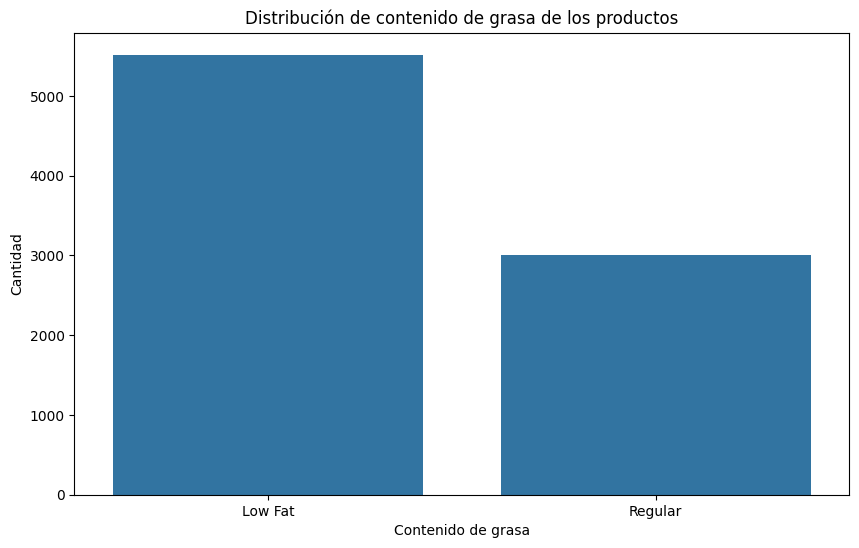

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Item_Fat_Content', data=df_spredictions)
plt.title('Distribución de contenido de grasa de los productos')
plt.xlabel('Contenido de grasa')
plt.ylabel('Cantidad')
plt.show()

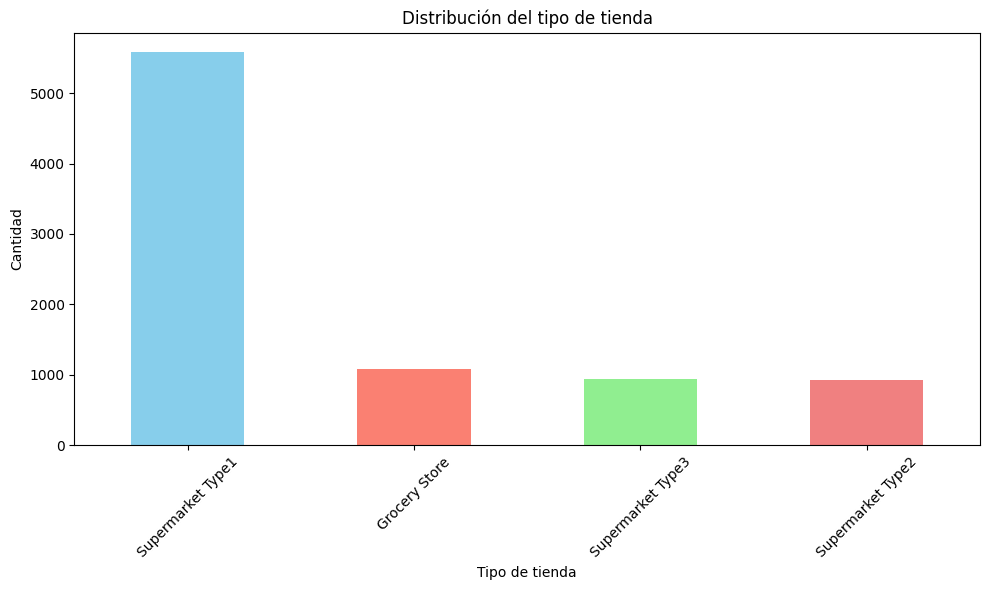

In [82]:
outlet_type_counts = df_spredictions['Outlet_Type'].value_counts()
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']
plt.figure(figsize=(10, 6))
outlet_type_counts.plot(kind='bar', color=colors)
plt.title('Distribución del tipo de tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

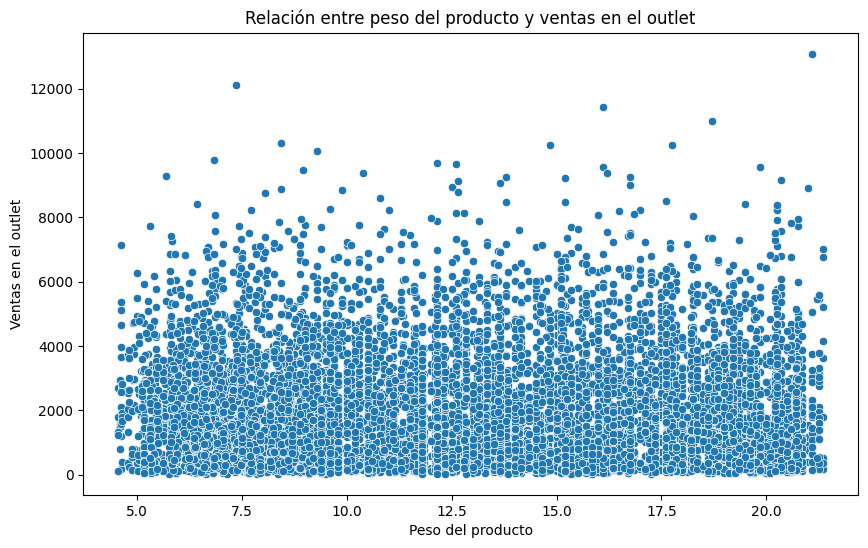

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df_spredictions)
plt.title('Relación entre peso del producto y ventas en el outlet')
plt.xlabel('Peso del producto')
plt.ylabel('Ventas en el outlet')
plt.show()

In [81]:
fig = px.histogram(df_spredictions, x='Item_Type', title='Distribución de tipos de productos')
fig.update_layout(xaxis_title='Tipo de producto', yaxis_title='Cantidad')
fig.show()

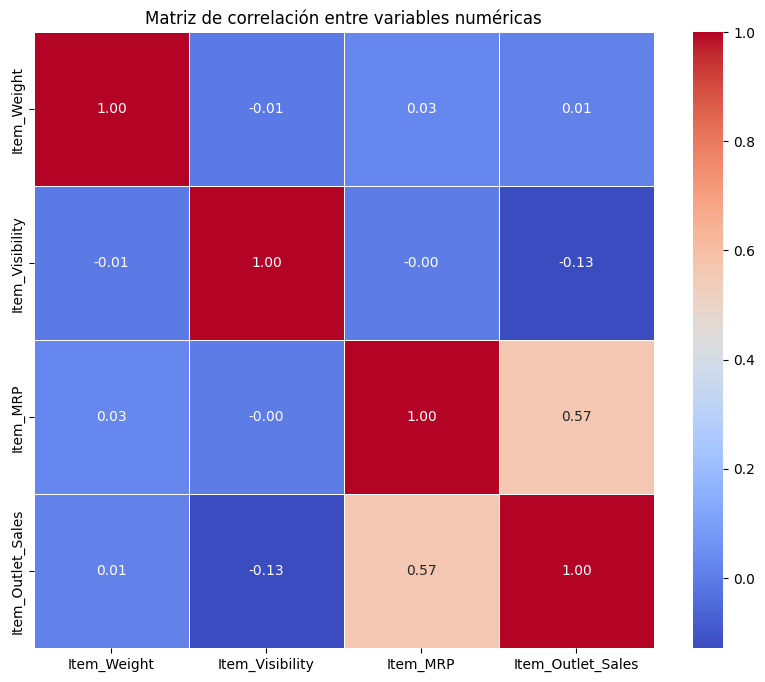

In [102]:
selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
correlation_df = df_spredictions[selected_columns]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

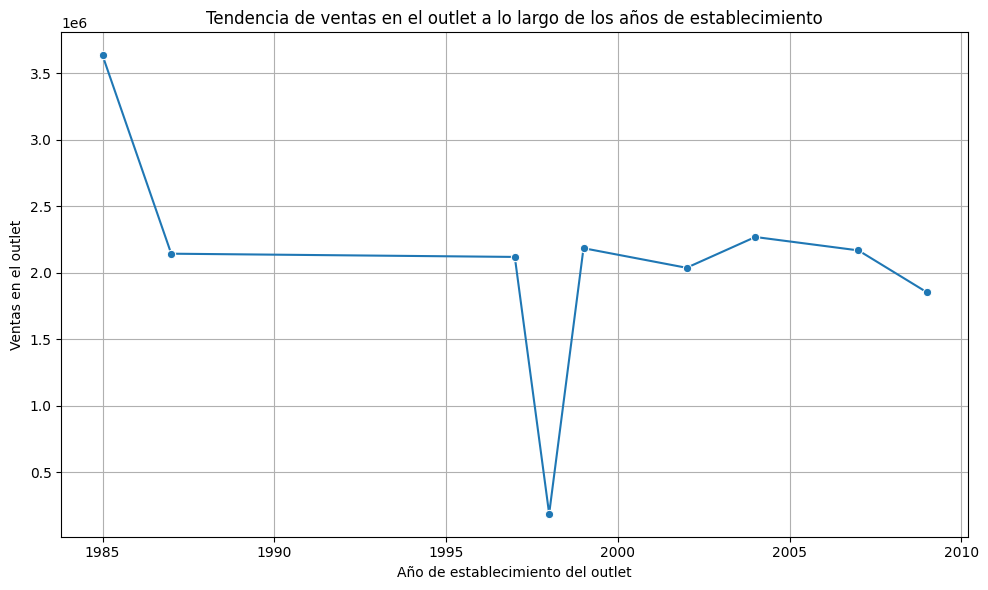

In [103]:
lineplot_df = df_spredictions.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()
lineplot_df = lineplot_df.sort_values(by='Outlet_Establishment_Year')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=lineplot_df, marker='o')
plt.title('Tendencia de ventas en el outlet a lo largo de los años de establecimiento')
plt.xlabel('Año de establecimiento del outlet')
plt.ylabel('Ventas en el outlet')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

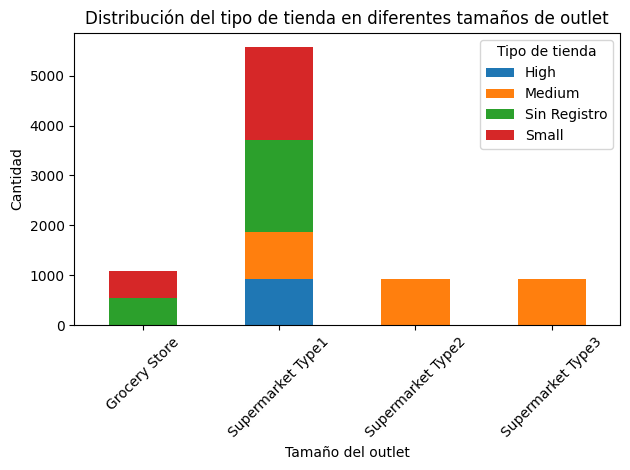

In [104]:
stacked_bar_df = df_spredictions.groupby(['Outlet_Type', 'Outlet_Size']).size().unstack()
plt.figure(figsize=(10, 6))
stacked_bar_df.plot(kind='bar', stacked=True)
plt.title('Distribución del tipo de tienda en diferentes tamaños de outlet')
plt.xlabel('Tamaño del outlet')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de tienda')
plt.tight_layout()
plt.show()

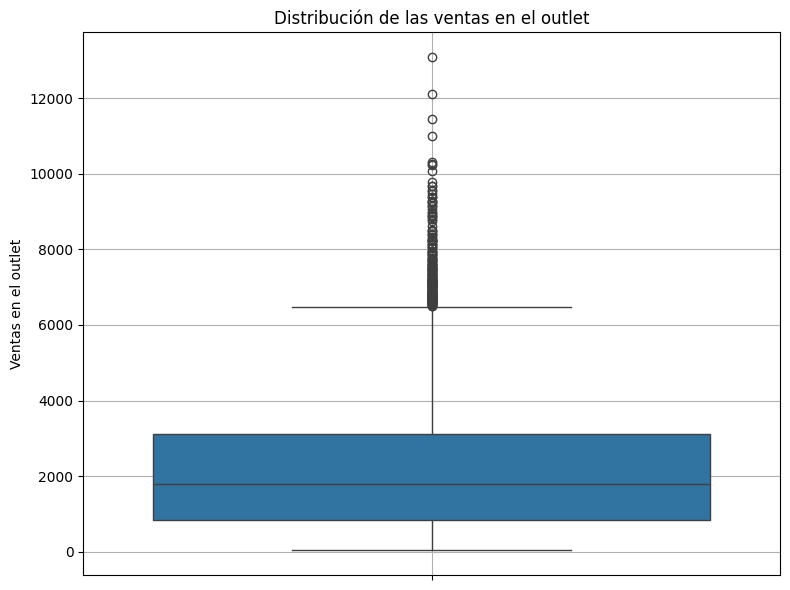

In [107]:
sales_data = df_spredictions['Item_Outlet_Sales']
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales_data)
plt.title('Distribución de las ventas en el outlet')
plt.ylabel('Ventas en el outlet')
plt.grid(True)
plt.tight_layout()
plt.show()

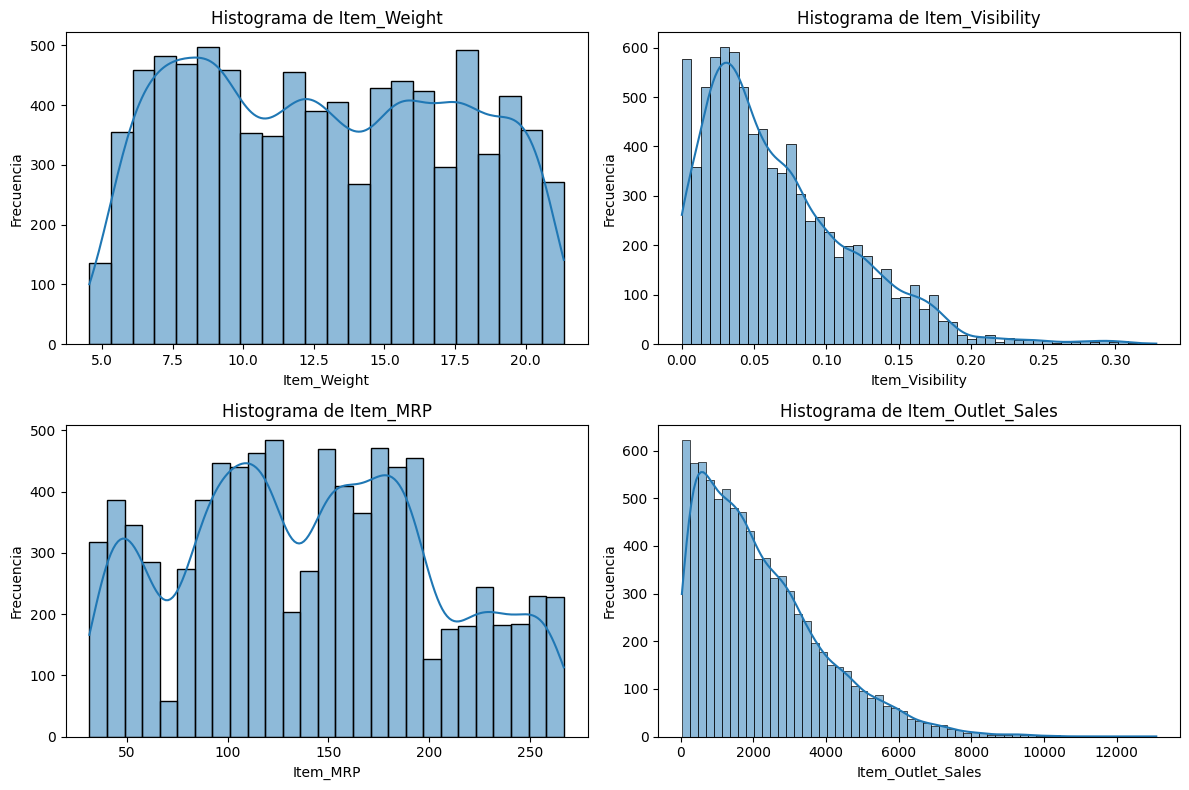

In [108]:
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_spredictions[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()